In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import rcParams

In [2]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Palatio']
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

colors = ["#56641a", "#c0affb", "#00678a", "#984464", "#5eccab", "#cdcdcd"]
c0 = colors[0]
c1 = colors[4]
c2 = colors[1]
c3 = colors[2]
c4 = colors[3]
c5 = colors[5]


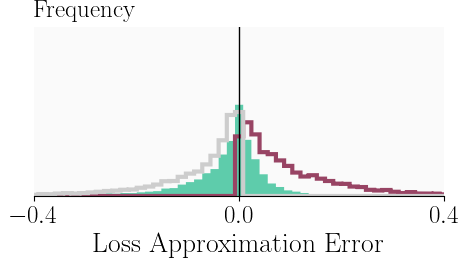

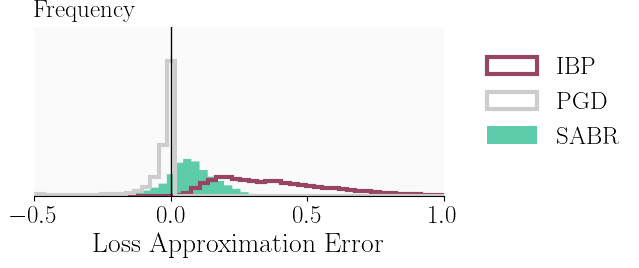

In [22]:
mode = "IBP" # IBP or TAPS

fig_height = 2.2


for mode in ["IBP", "SABR"]:

    if mode == "TAPS":
        fig, ax = plt.subplots(figsize=(3.05*fig_height, fig_height))
    else:
        fig, ax = plt.subplots(figsize=(2.4*fig_height, fig_height))

    fontsize=18

    ax.set_facecolor( (0.98, 0.98, 0.98) )
    ax.set_yticks([], [])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.label.set_size(20)
    ax.yaxis.set_label_coords(0.0, 1.03)
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    n=50.
    if mode == "IBP":
        d = 0.8 / n
    elif mode == "TAPS":
        d = 2. / n
    elif mode == "SABR":
        d = 1.5 / n
    else:
        assert False

    bins = np.concatenate([np.arange(-d/2,-5.-d/2.,-d)[::-1], np.arange(d/2,5.+d/2.+d/100.,d)], 0)

    root_path = f"exact_tightness/{mode}_results"
    IBP_bounds = (np.load(os.path.join(root_path, "IBP.npy"))).reshape(-1, 9)
    PGD_bounds = (np.load(os.path.join(root_path, "PGD.npy"))).reshape(-1, 9)
    # TAPS_bounds = (np.load(os.path.join(root_path, "TAPS.npy"))).reshape(-1, 9)
    MILP_bounds = (np.load(os.path.join(root_path, "MILP.npy"))).reshape(-1, 9)
    small_SABR_bounds = (np.load(os.path.join(root_path, "small_SABR.npy"))).reshape(-1, 9)
    SABR_bounds = (np.load(os.path.join(root_path, "large_SABR.npy"))).reshape(-1, 9)


    # The estimated largest logit gap
    idxs = np.expand_dims(MILP_bounds.argmax(1),1)

    PGD_diff = np.take_along_axis(PGD_bounds-MILP_bounds, idxs, 1).flatten()
    filter = PGD_diff <= 0 # numerical error
    # filter = np.ones_like(filter)
    PGD_diff = PGD_diff[filter]
    IBP_diff = np.take_along_axis(IBP_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    # TAPS_diff = np.take_along_axis(TAPS_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    SABR_diff = np.take_along_axis(SABR_bounds-MILP_bounds, idxs, 1).flatten()[filter]
    small_SABR_diff = np.take_along_axis(small_SABR_bounds-MILP_bounds, idxs, 1).flatten()[filter]


    ax.vlines(0, 0, 100, color="black", lw=1, zorder=20)
    ax.hist(IBP_diff, bins=bins, density=True, color=c4, histtype="step", label="IBP", lw=3)
    ax.hist(PGD_diff, bins=bins, density=True, color=c5, histtype="step", label="PGD", lw=3)
    # ax.hist(small_SABR_diff, bins=bins, density=True, histtype="step", label="small_SABR")
    ax.hist(SABR_diff, bins=bins, density=True, color=c1, histtype="stepfilled", label="SABR", lw=3)
    # ax.hist(TAPS_diff, bins=bins, density=True, color=c3, histtype="stepfilled", label="TAPS", lw=3, zorder=1)

    ax.set_ylabel("Frequency", fontsize=fontsize, rotation=0, ha="left")
    ax.set_xlabel("Loss Approximation Error")
    if mode == "IBP":
        ax.set_xlim(-0.4, 0.4)
        ax.set_xticks([-0.4,0,0.4], fontsize=fontsize)
        ax.set_ylim(0, 20)
    elif mode == "SABR":
        ax.set_xlim(-0.5, 1)
        ax.set_xticks([-0.5,0,0.5,1], fontsize=fontsize)
        ax.set_ylim(0, 20)


    if mode == "SABR":
        ax.legend(bbox_to_anchor=(1.05, 0.55), loc='center left', fontsize=fontsize, frameon=False,ncol=1)


    # plt.tight_layout()
    # plt.savefig(f"exact_tightness_{mode}.pdf")
    plt.savefig(f"/Users/mark/Projects/TAPS/sampling-cert-training-paper/paper/figures/SABR_exact_tightness_{mode}.png", bbox_inches="tight", pad_inches=0.12)
    plt.savefig(f"/Users/mark/Projects/TAPS/sampling-cert-training-paper/paper/figures/SABR_exact_tightness_{mode}.pdf", bbox_inches="tight", pad_inches=0.12)
